Data shape: (442, 10)
Target shape: (442,)
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
       age: -60.21981405677319
       sex: -266.457052322036
       bmi: 523.0634112596993
        bp: 310.5134699670052
        s1: -336.16147381069544
        s2: 137.33929238424565
        s3: -131.13923283453624
        s4: -1.149234801731512
        s5: 622.3286855688131
        s6: 60.46645769168258
LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421


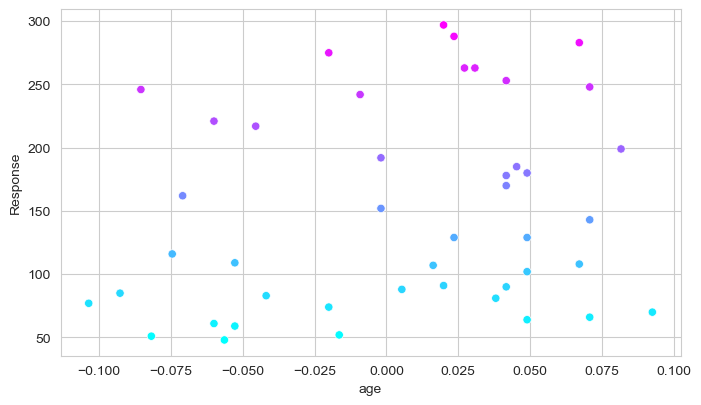

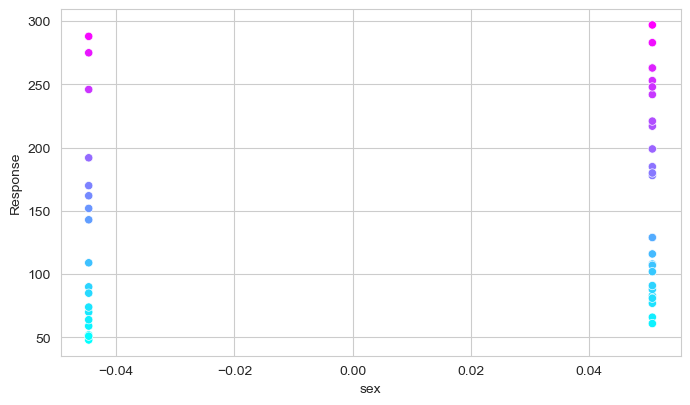

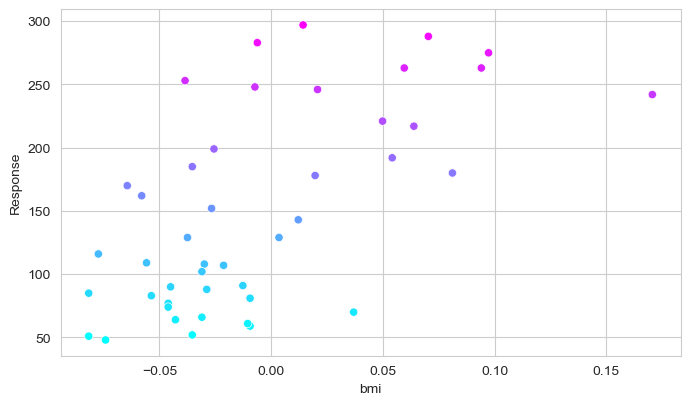

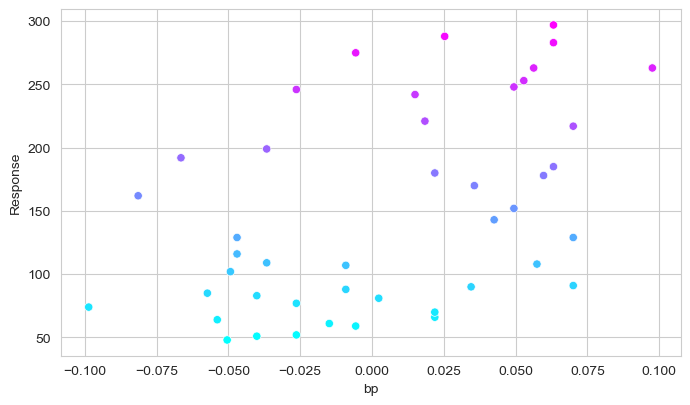

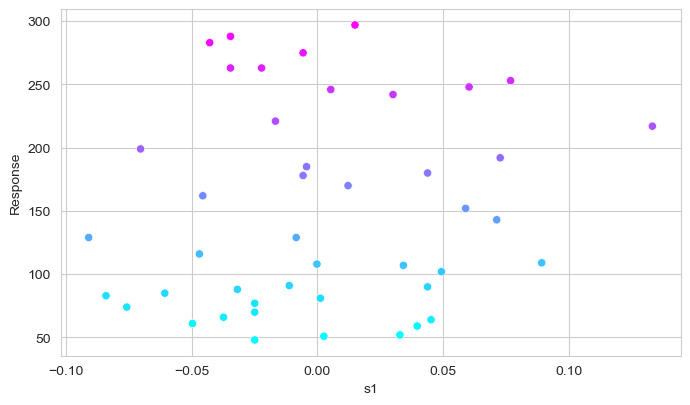

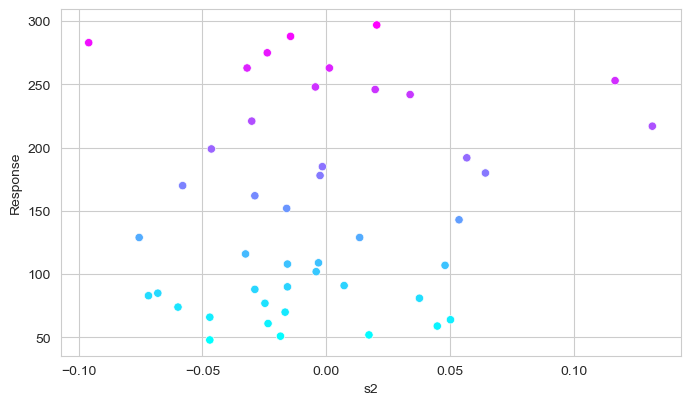

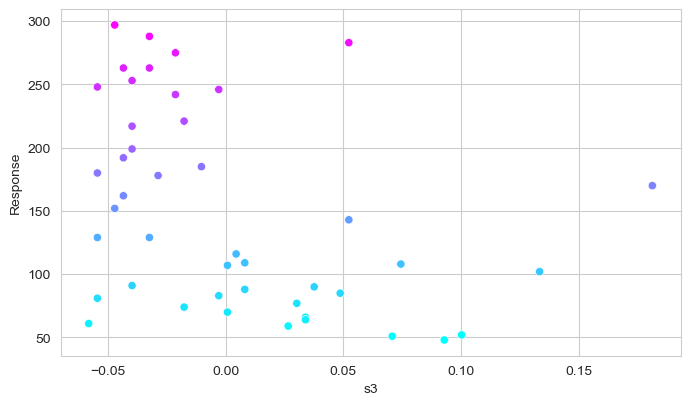

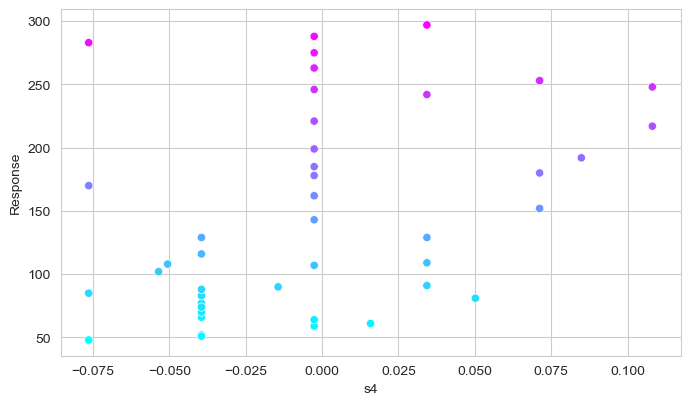

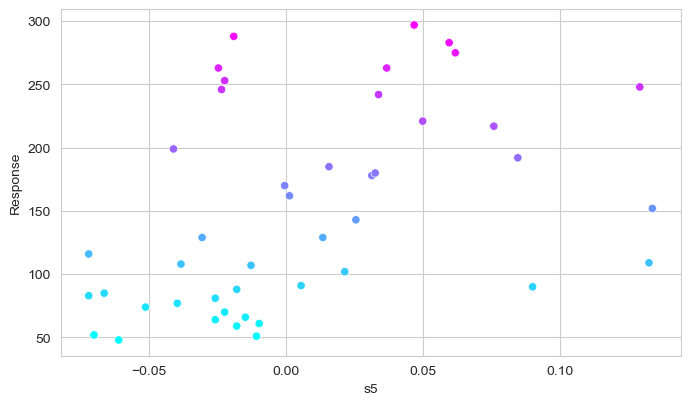

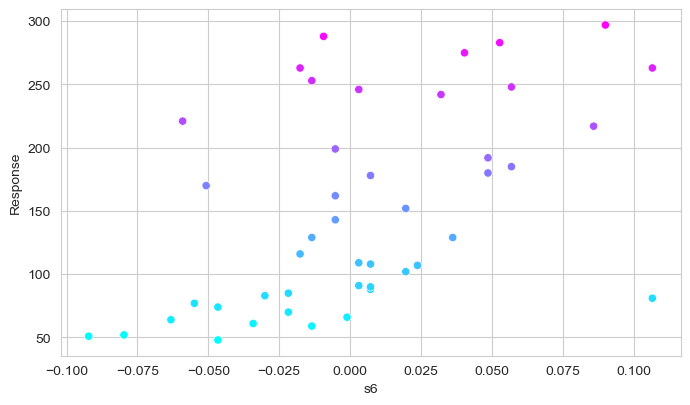

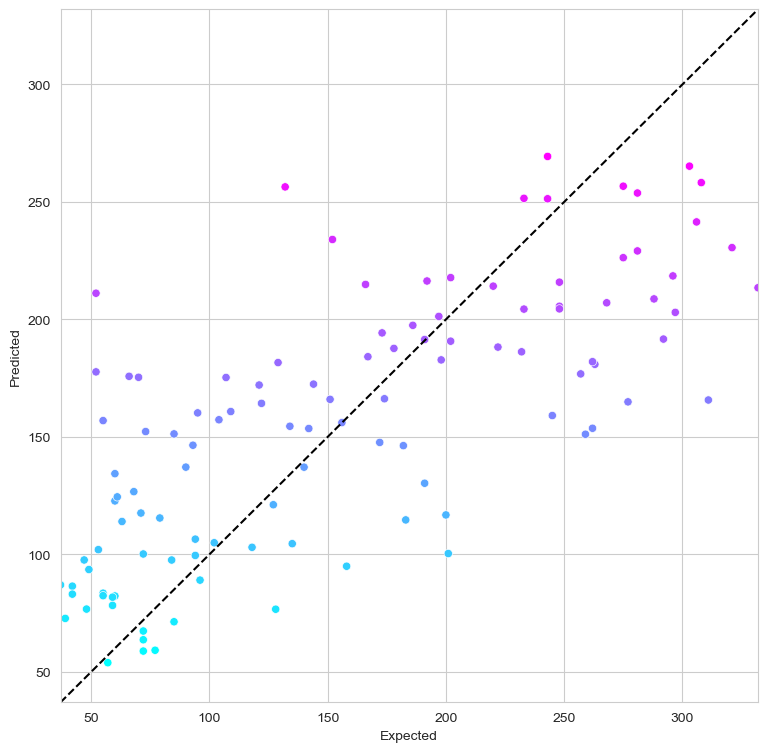

In [26]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.precision', 4)

diabetes = load_diabetes()

print('Data shape:', diabetes.data.shape)
print('Target shape:', diabetes.target.shape)
print('Feature names:', diabetes.feature_names)

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['Response'] = pd.Series(diabetes.target)
diabetes_df.head()
diabetes_df.describe()
sample_df = diabetes_df.sample(frac=0.1, random_state=17)
sns.set_style('whitegrid')        

for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4.5)) 
    sns.scatterplot(data=sample_df, x=feature, 
                    y='Response', hue='Response', 
                    palette='cool', legend=False)
    
X_train, X_test, y_train, y_test = train_test_split(
diabetes.data, diabetes.target, random_state=11)
    
X_train.shape
    
X_test.shape
    
linear_regression = LinearRegression()
    
linear_regression.fit(X=X_train, y=y_train)
    
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}') 
    
linear_regression.intercept_
    
predicted = linear_regression.predict(X_test)

expected = y_test

predicted[:5] 

expected[:5] 

df = pd.DataFrame()

df['Expected'] = pd.Series(expected)

df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
    hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

metrics.r2_score(expected, predicted)

estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                             X=diabetes.data,
                             y=diabetes.target,
                             cv=kfold,
                             scoring='r2')
    print(f'{estimator_name:>16}: mean of r2 scores={np.mean(scores):.3f}')